# Privacy Policies: Word Relevance Analysis 

 - Saving word idf-s found in privacy policies (useful to inform heuristics later)
 - Visualizing highly relevant words in privacy policies as a word cloud

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from privacy_bot.analysis.policies_snapshot_api import Policies
from privacy_bot.analysis.visualization import wordcloud_from_dict

import json

### Loading Policies using `policies_snapshot_api`

In [2]:
policies = Policies()
corpus = [policy.text for policy in policies.query(lang='en')]

Get Latest Release
--------------------------------------------------------------------------------
Name: Raw privacy policies sample (Among top 1000)
Tag: 01-06-2017_v2_sample
Url: https://api.github.com/repos/cliqz-oss/privacy-bot/zipball/01-06-2017_v2_sample
--------------------------------------------------------------------------------
Load cached content
Load archive


### Using `TfidVectorizer` of sklearn

In [3]:
# Vectorizing policies
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_

# Getting scored words
idf_dict = dict(zip(vectorizer.get_feature_names(), idf))
sorted_word_idf_tuples = sorted(idf_dict.items(), key=lambda x: x[1])

# Look at top 20 most relevant words found
print([w for (w, idf) in sorted_word_idf_tuples[0:20]])

['privacy', 'use', 'policy', 'information', 'service', 'contact', 'personal', 'browser', 'cookies', 'data', 'online', 'collect', 'site', 'terms', 'website', 'access', 'address', 'content', 'time', 'web']


### Visualizing the most important words

We are going to use the idf_dict as input, where `key -> word`, `value -> idf`. A smaller idf is desirable. Since the wordcloud function we use for visualization uses frequencies, we can artifically generate naive higher frequencies for smaller idf-s with a the following function: 

$$ f(idf) = \frac{1}{idf} \times 100 $$

In [4]:
freq_idf_dict = dict((k, (1.0/v)*100) for k, v in idf_dict.items())

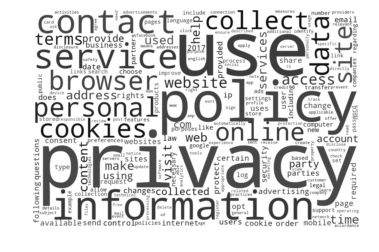

In [5]:
wordcloud_from_dict(freq_idf_dict)